In [9]:
import networkx as nx




In [10]:
%load_ext autoreload
%autoreload 2

import random
import networkx as nx
import numpy as np

from qiskit_optimization.applications.tsp import Tsp
from qiskit_optimization.algorithms import  CplexOptimizer
from qiskit.utils import algorithm_globals



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
low=0
high=100
n=3

In [12]:
tsp = Tsp.create_random_instance(n, seed=123)

In [13]:
nx.to_numpy_matrix(tsp.graph)

matrix([[ 0., 48., 91.],
        [48.,  0., 63.],
        [91., 63.,  0.]])

In [14]:
 algorithm_globals.random.uniform(low, high, (n, 2))

array([[92.3344998 , 27.65743978],
       [81.97545616, 88.98926931],
       [51.29704552, 24.49646011]])

In [15]:
from typing import Union, OrderedDict

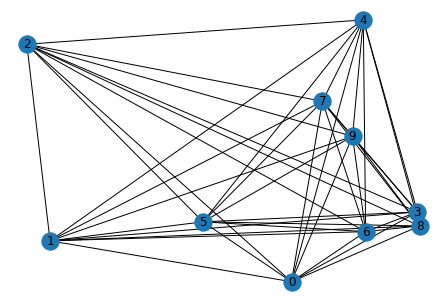

In [18]:
tsp = Tsp.create_random_instance(n=10, seed=123)
g = tsp.graph
#print([g.nodes[node]['pos']  for node in g.nodes])
pos=[g.nodes[node]['pos']  for node in g.nodes]
nx.draw(g, with_labels=True, pos=[g.nodes[node]['pos']  for node in g.nodes])
# for i, j in g.edges:
#     print(g.edges[i, j]['weight'])


In [19]:
qp=tsp.to_quadratic_program()
qp

0_3*x_7_2 + 116 x_0_3*x_7_4
      + 60 x_0_3*x_8_2 + 60 x_0_3*x_8_4 + 96 x_0_3*x_9_2 + 96 x_0_3*x_9_4
      + 96 x_0_4*x_1_3 + 96 x_0_4*x_1_5 + 182 x_0_4*x_2_3 + 182 x_0_4*x_2_5
      + 66 x_0_4*x_3_3 + 66 x_0_4*x_3_5 + 170 x_0_4*x_4_3 + 170 x_0_4*x_4_5
      + 52 x_0_4*x_5_3 + 52 x_0_4*x_5_5 + 42 x_0_4*x_6_3 + 42 x_0_4*x_6_5
      + 116 x_0_4*x_7_3 + 116 x_0_4*x_7_5 + 60 x_0_4*x_8_3 + 60 x_0_4*x_8_5
      + 96 x_0_4*x_9_3 + 96 x_0_4*x_9_5 + 96 x_0_5*x_1_4 + 96 x_0_5*x_1_6
      + 182 x_0_5*x_2_4 + 182 x_0_5*x_2_6 + 66 x_0_5*x_3_4 + 66 x_0_5*x_3_6
      + 170 x_0_5*x_4_4 + 170 x_0_5*x_4_6 + 52 x_0_5*x_5_4 + 52 x_0_5*x_5_6
      + 42 x_0_5*x_6_4 + 42 x_0_5*x_6_6 + 116 x_0_5*x_7_4 + 116 x_0_5*x_7_6
      + 60 x_0_5*x_8_4 + 60 x_0_5*x_8_6 + 96 x_0_5*x_9_4 + 96 x_0_5*x_9_6
      + 96 x_0_6*x_1_5 + 96 x_0_6*x_1_7 + 182 x_0_6*x_2_5 + 182 x_0_6*x_2_7
      + 66 x_0_6*x_3_5 + 66 x_0_6*x_3_7 + 170 x_0_6*x_4_5 + 170 x_0_6*x_4_7
      + 52 x_0_6*x_5_5 + 52 x_0_6*x_5_7 + 42 x_0_6*x_6_5 + 42 x_0_6*

In [20]:
optimizer = CplexOptimizer()
result = optimizer.solve(qp)
result

optimal function value: 286.0
optimal value: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0.]
status: SUCCESS

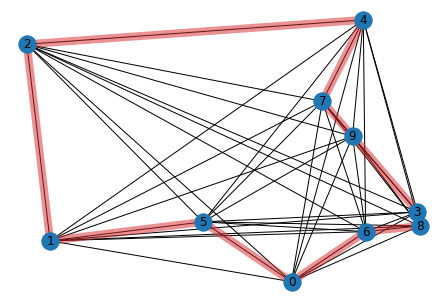

In [21]:
tsp.draw(result, pos)